Exploratory Data Analysis

Roles to Explore:

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs') 
df = dataset['train'].to_pandas()

#  Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


c:\Users\vhapp\anaconda3\envs\python_project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Filter for INDIA Data Analyst Roles

In [2]:
df_DA_IND = df[(df['job_country'] == 'India') & (df['job_title']=='Data Analyst') & (df['job_location']!='India') ]
df_DA_IND

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
159,Data Analyst,Data Analyst,"Hyderabad, Telangana, India",via LinkedIn,Contractor,False,India,2023-11-28 13:12:07,False,False,India,None,NaN,NaN,Fusion Plus Solutions Inc,[sql],{'programming': ['sql']}
504,Data Analyst,Data Analyst,"Hyderabad, Telangana, India",via Shine,Full-time,False,India,2023-11-12 13:08:06,True,False,India,None,NaN,NaN,HSBC,"[sql, nosql, python, r, mysql, sql server, pos...","{'analyst_tools': ['qlik', 'tableau', 'power b..."
1399,Data Analyst,Data Analyst,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-07-04 13:13:00,True,False,India,None,NaN,NaN,Infosys BPM,"[sql, shell, r, bigquery, pandas, linux, excel...","{'analyst_tools': ['excel', 'tableau', 'qlik']..."
1504,Data Analyst,Data Analyst,"Bengaluru, Karnataka, India",via LinkedIn,Full-time,False,India,2023-06-11 13:09:01,False,False,India,None,NaN,NaN,Indium Software,"[sql, sas, sas, r, python]","{'analyst_tools': ['sas'], 'programming': ['sq..."
1944,Data Analyst,Data Analyst,"Bengaluru, Karnataka, India",via LinkedIn,Full-time,False,India,2023-10-31 13:09:48,False,False,India,None,NaN,NaN,WorkOnGrid,"[sql, flow]","{'other': ['flow'], 'programming': ['sql']}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784845,Data Analyst,Data Analyst,"Bengaluru, Karnataka, India",via LinkedIn,Full-time,False,India,2023-01-25 06:14:59,True,False,India,None,NaN,NaN,Capgemini,"[sql, visio]","{'analyst_tools': ['visio'], 'programming': ['..."
785157,Data Analyst,Data Analyst,"Hyderabad, Telangana, India",via LinkedIn,Full-time,False,India,2023-01-31 06:11:12,False,False,India,None,NaN,NaN,ARYAN TECHNOLOGY,"[sql, javascript, sas, sas, excel, spss]","{'analyst_tools': ['sas', 'excel', 'spss'], 'p..."
785515,Data Analyst,Data Analyst,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-09-01 06:17:34,False,False,India,year,105000.0,NaN,Myntra,None,None
785548,Data Analyst,Data Analyst,"Bengaluru, Karnataka, India",via LinkedIn,Full-time,False,India,2023-01-19 06:14:17,False,False,India,None,NaN,NaN,Artech L.L.C.,"[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."


C:\Users\vhapp\AppData\Local\Temp\ipykernel_21412\1361652842.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([


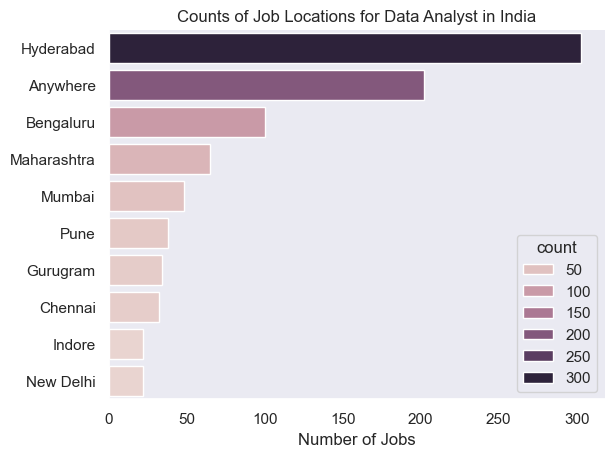

In [3]:
df_plot = df_DA_IND['job_location'].value_counts().head(10).to_frame()
sns.set_theme(style='dark')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count')
sns.despine()
plt.title('Counts of Job Locations for Data Analyst in India')
plt.xlabel('Number of Jobs')
plt.ylabel('')
ax = plt.gca()

ax.set_yticklabels([
    label.get_text().split(",")[0]
    for label in ax.get_yticklabels()
])
plt.show()



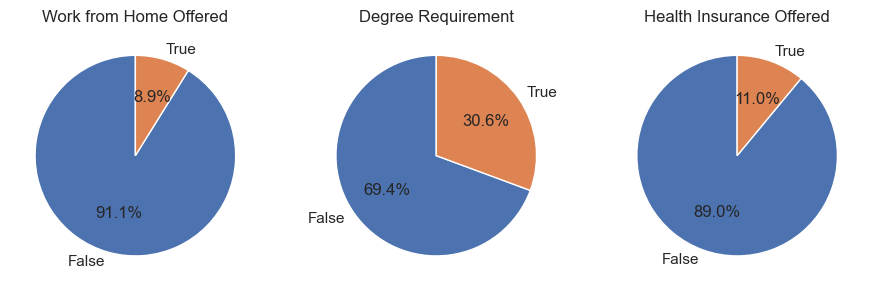

In [4]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize=(11, 3.5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()


C:\Users\vhapp\AppData\Local\Temp\ipykernel_21412\1367480283.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([


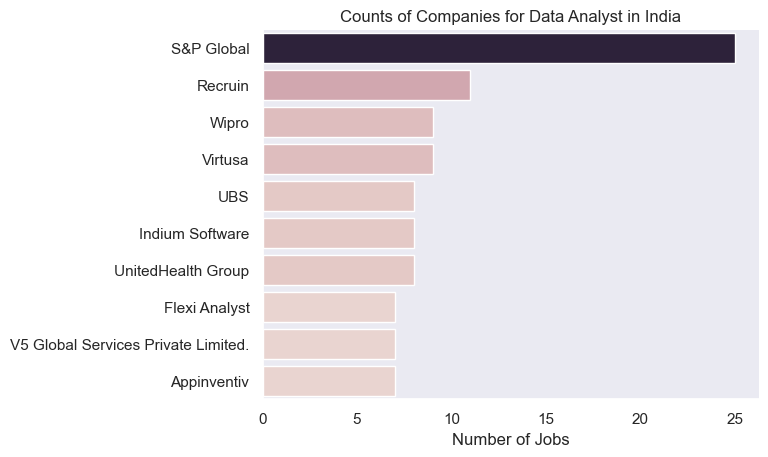

In [5]:
df_plot = df_DA_IND['company_name'].value_counts().head(10).to_frame()
sns.set_theme(style='dark')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', legend=False)
sns.despine()
plt.title('Counts of Companies for Data Analyst in India')
plt.xlabel('Number of Jobs')
plt.ylabel('')
ax = plt.gca()

ax.set_yticklabels([
    label.get_text().split(",")[0]
    for label in ax.get_yticklabels()
])
plt.show()

